<H1>Classify cells to whether the samples are benign or malignant.</H1>

                                <-- -->

<h1>Load the Cancer data</h1>

In [1]:
#Import libraries
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [51]:
#Load Cancer Data
cell_df = pd.read_csv('cell_samples.csv')
cell_df.head()

,Unnamed: 0,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,0,1000025,5,1,1,1,2,1,3,1,1,2
1,1,1002945,5,4,4,5,7,10,3,2,1,2
2,2,1015425,3,1,1,1,2,2,3,1,1,2
3,3,1016277,6,8,8,1,3,4,3,7,1,2
4,4,1017023,4,1,1,3,2,1,3,1,1,2


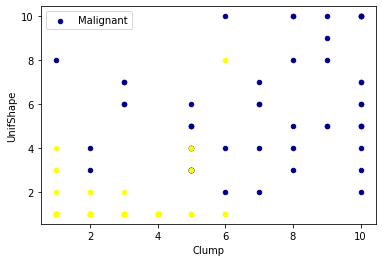

In [52]:
#Plot an example of the data
ax = cell_df[cell_df['Class']==4][0:50].plot(kind='scatter', x='Clump', y='UnifShape', color ='DarkBlue', label='Malignant')
cell_df[cell_df['Class']==2][0:50].plot(kind='scatter', x='Clump', y='UnifShape', color ='Yellow', ax=ax)
plt.show()

<h1>Data pre-processing and selection</h1>

In [8]:
#Types of columns
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [11]:
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'],errors='coerce').notnull()]
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [12]:
cell_df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [14]:
feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
X = np.asarray(feature_df)
X[0:5]

array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [15]:
cell_df['Class'] = cell_df['Class'].astype('int')
y = np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

<h1>Train/Test dataset</h1>

In [18]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)

Train set:  (546, 9) (546,)
Test set:  (137, 9) (137,)


<h1>Modeling (SVM with Scikit-learn)</h1>

In [20]:
from sklearn import svm
clf = svm.SVC(kernel = 'rbf')
clf.fit(X_train, y_train)

SVC()

In [21]:
yhat= clf.predict(X_test)
yhat[0:5]

array([2, 4, 2, 4, 2])

<h1>Evaluation</h1>

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

In [27]:
cm = confusion_matrix(y_test,yhat)
cm

array([[85,  5],
       [ 0, 47]], dtype=int64)

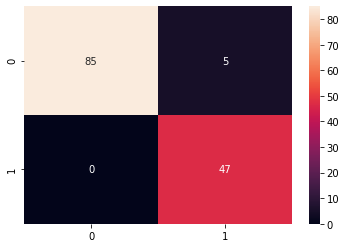

In [28]:
#Plot the confusion Matrix
import seaborn as sns
sns.heatmap(cm, annot=True)

In [29]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



In [34]:
#jaccard Score
from sklearn.metrics import jaccard_score
print ('Jaccard Score for the class 2 is: %.2f'%jaccard_score(y_test,yhat, pos_label=2))
print ('jaccard Score for the class 4 is: %.2f'%jaccard_score(y_test,yhat,pos_label=4))

Jaccard Score for the class 2 is: 0.94
jaccard Score for the class 4 is: 0.90


<h3>Tunig the hyperparameters </h3>

Kernel :  linear


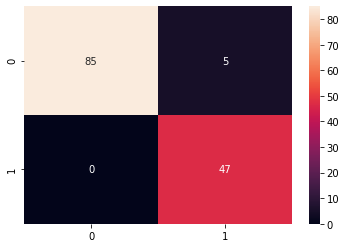

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Jaccard Score for the class 2 is: 0.94
Jaccard Score for the class 4 is: 0.90
Kernel :  poly


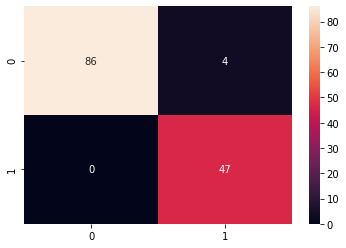

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

Jaccard Score for the class 2 is: 0.96
Jaccard Score for the class 4 is: 0.92
Kernel :  sigmoid


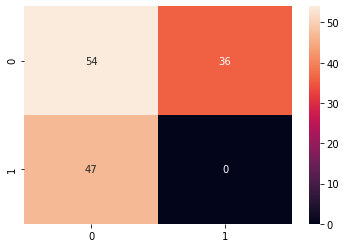

              precision    recall  f1-score   support

           2       0.53      0.60      0.57        90
           4       0.00      0.00      0.00        47

    accuracy                           0.39       137
   macro avg       0.27      0.30      0.28       137
weighted avg       0.35      0.39      0.37       137

Jaccard Score for the class 2 is: 0.39
Jaccard Score for the class 4 is: 0.00


In [42]:
kernels = ['linear', 'poly', 'sigmoid']
for kernel in kernels:
    print('Kernel : ', kernel)
    clfh = svm. SVC(kernel = kernel)
    clfh.fit(X_train, y_train)
    yhath = clfh.predict(X_test)
    cmh = confusion_matrix(y_test,yhath)
    sns.heatmap(cmh,annot=True)
    plt.show()
    print(classification_report(y_test,yhath))
    print('Jaccard Score for the class 2 is: %.2f'%jaccard_score(y_test,yhath, pos_label=2))
    print('Jaccard Score for the class 4 is: %.2f'%jaccard_score(y_test,yhath,pos_label=4))

<b>Note: </b>We can see that the best result was obtained with the Polynomial kernel and the worst with the sigmoid kernel. So the Model will deployed using the Polynomial kernel.

              precision    recall  f1-score   support

           2       1.00      0.96      0.98        90
           4       0.92      1.00      0.96        47

    accuracy                           0.97       137
   macro avg       0.96      0.98      0.97       137
weighted avg       0.97      0.97      0.97       137

The Jaccard Score for the class 2:0.96
The Jaccard Score for the class 4:0.92


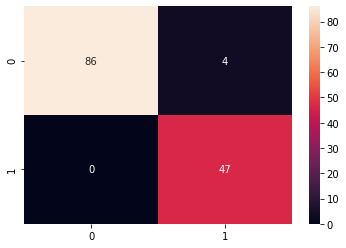

In [45]:
model = svm.SVC(kernel = 'poly')
model.fit(X_train, y_train)
yhatp = model.predict(X_test)
cmp= confusion_matrix(y_test,yhatp)
sns.heatmap(cmp,annot=True)
print(classification_report(y_test,yhatp))
print('The Jaccard Score for the class 2:%.2f'%jaccard_score(y_test,yhatp,pos_label=2))
print('The Jaccard Score for the class 4:%.2f'%jaccard_score(y_test,yhatp,pos_label=4))


<h1>Use the Model for Inferencing</h1>

Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:

In [46]:
import joblib

#Save the model as a pickle file
filename = 'benign_malignant_cell.pkl'
joblib.dump(model,filename)



['benign_malignant_cell.pkl']

We can load the model and use it to predict values for the unknown label:

In [49]:
#Load the model from the file
model = joblib.load(filename)

# We'll create an array with a single array of features, representing one patient
X_new = np.array([[3,4,1,5,3,2,2,3,2]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction 
pred = model.predict(X_new)

print('Predicted class is {}'.format(pred[0]))

New sample: [3, 4, 1, 5, 3, 2, 2, 3, 2]
Predicted class is 2
